In [1]:
# ! pip remove fbprophet
# ! pip install pystan==2.19.1.1
# ! pip install fbprophet

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [3]:
df = pd.read_csv('ts_data.csv')
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [4]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [5]:
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [6]:
fig = px.line(df, x='timeStamp', y='demand', title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [7]:
ny_df=df.set_index('timeStamp')
ny_df.head()

,demand,precip,temp
timeStamp,,,
2012-01-01 00:00:00,4937.5,0.0,46.13
2012-01-01 01:00:00,4752.1,0.0,45.89
2012-01-01 02:00:00,4542.6,0.0,45.04
2012-01-01 03:00:00,4357.7,0.0,45.03
2012-01-01 04:00:00,4275.5,0.0,42.61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf75f6a7d0>,
      dtype=object)

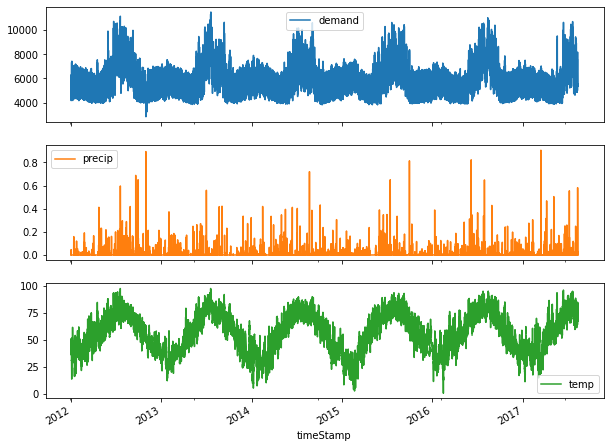

In [8]:
ny_df.plot(subplots=True)

In [9]:
# convert to daily data by aggregating MEAN
ny_df.resample('D').mean()

,demand,precip,temp
timeStamp,,,
2012-01-01,4954.833333,0.002487,46.510000
2012-01-02,5302.954167,0.000000,40.496667
2012-01-03,6095.512500,0.000000,26.672500
2012-01-04,6336.266667,0.000000,20.585000
2012-01-05,6130.245833,0.000000,33.577500
...,...,...,...
2017-08-08,6471.626042,0.000000,71.039167
2017-08-09,6811.112167,0.047529,73.852500
2017-08-10,5582.297000,0.002033,75.217500


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf74936850>,
      dtype=object)

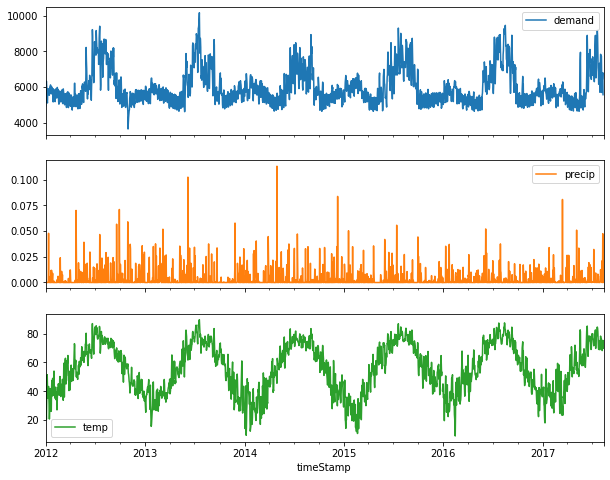

In [10]:
ny_df.resample('D').mean().plot(subplots=True)

In [11]:
# aggregating daily data MEAN
ny_df_daily = ny_df.resample('D').mean()
ny_df_daily.head()

,demand,precip,temp
timeStamp,,,
2012-01-01,4954.833333,0.002487,46.510000
2012-01-02,5302.954167,0.000000,40.496667
2012-01-03,6095.512500,0.000000,26.672500
2012-01-04,6336.266667,0.000000,20.585000
2012-01-05,6130.245833,0.000000,33.577500


y(t)= g(t) + s(t) + h(t) + εt

In [12]:
from fbprophet import Prophet

In [13]:
#formatting col names as per FBPrphphet rules
ny_df_final = ny_df_daily.reset_index()[['timeStamp','demand']].rename({'timeStamp':'ds','demand':'y'}, axis='columns')
ny_df_final.head()

,ds,y
0,2012-01-01,4954.833333
1,2012-01-02,5302.954167
2,2012-01-03,6095.512500
3,2012-01-04,6336.266667
4,2012-01-05,6130.245833


In [14]:
train = ny_df_final[(ny_df_final['ds'] >= '2012-01-01') & (ny_df_final['ds'] <= '2017-04-30')]
test = ny_df_final[(ny_df_final['ds'] > '2017-04-30')]

In [15]:
train.head()

,ds,y
0,2012-01-01,4954.833333
1,2012-01-02,5302.954167
2,2012-01-03,6095.512500
3,2012-01-04,6336.266667
4,2012-01-05,6130.245833


In [16]:
train.shape, test.shape

((1947, 2), (104, 2))

In [17]:
m = Prophet(interval_width=0.95,yearly_seasonality=True)

In [18]:
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
m.params

{'k': array([[0.08895525]]),
 'm': array([[0.59330417]]),
 'delta': array([[ 2.97534563e-09, -2.54605198e-07, -1.01979086e-01,
         -1.12338365e-08,  2.80534300e-09,  1.62508765e-08,
         -5.22679734e-08, -1.16075049e-08, -1.53930702e-07,
         -2.92604184e-08, -2.69181000e-02, -7.35866468e-02,
         -1.45876933e-08, -5.89760992e-08,  2.35046545e-01,
          5.85259548e-05, -1.05435640e-07, -8.71744213e-02,
         -4.32663939e-02, -6.02327178e-08,  2.83861158e-08,
          3.24800542e-08,  8.00639127e-03,  3.86001162e-03,
          3.53863651e-07]]),
 'sigma_obs': array([[0.04600916]]),
 'beta': array([[-0.03458069, -0.0705141 ,  0.05760564,  0.04705875, -0.01406572,
         -0.005001  , -0.00386455, -0.00073737,  0.00242053, -0.00755783,
          0.00405203,  0.0048309 , -0.00789597, -0.00470246,  0.00701919,
         -0.00268503, -0.00127789,  0.00170614,  0.00035376, -0.00021813,
         -0.02824817,  0.0238519 ,  0.02062351,  0.00054815, -0.0049496 ,
         

In [20]:
future = m.make_future_dataframe(periods=104)
future.head()

,ds
0,2012-01-01
1,2012-01-02
2,2012-01-03
3,2012-01-04
4,2012-01-05


In [21]:
test.head()

,ds,y
1947,2017-05-01,5417.231583
1948,2017-05-02,5697.950042
1949,2017-05-03,5354.628500
1950,2017-05-04,5235.704833
1951,2017-05-05,5358.639500


In [22]:
forecast = m.predict(test[['ds']])
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-05-01,5425.942407,4567.741350,6344.363400
1,2017-05-02,5540.816891,4709.712135,6424.612122
2,2017-05-03,5547.198360,4557.642800,6464.227200
3,2017-05-04,5517.544953,4681.459207,6419.126209
4,2017-05-05,5486.965831,4559.936296,6444.721850


In [23]:
forecast1 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
forecast1['actuals'] = test['y'].tolist()
forecast1.head()

,ds,yhat,yhat_lower,yhat_upper,actuals
0,2017-05-01,5425.942407,4567.741350,6344.363400,5417.231583
1,2017-05-02,5540.816891,4709.712135,6424.612122,5697.950042
2,2017-05-03,5547.198360,4557.642800,6464.227200,5354.628500
3,2017-05-04,5517.544953,4681.459207,6419.126209,5235.704833
4,2017-05-05,5486.965831,4559.936296,6444.721850,5358.639500


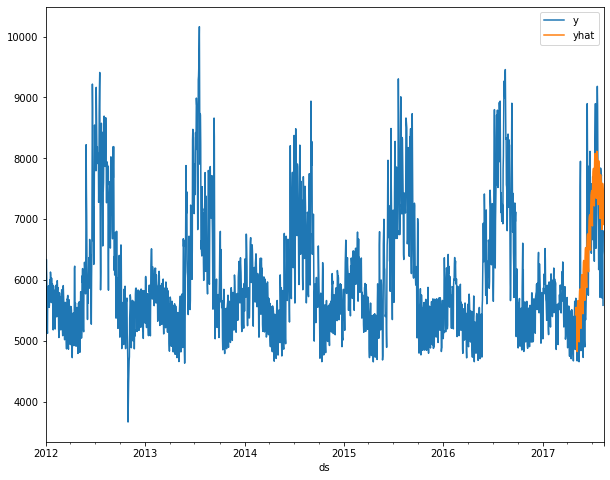

In [24]:
pd.concat([ny_df_final.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

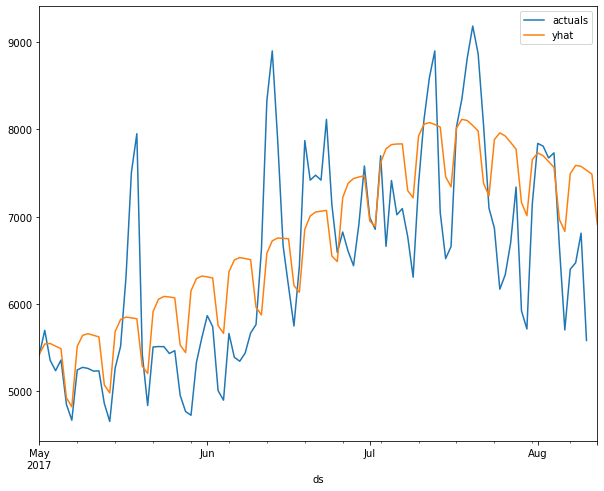

In [25]:
pd.concat([forecast1.set_index('ds')['actuals'],forecast1.set_index('ds')['yhat']],axis=1).plot()

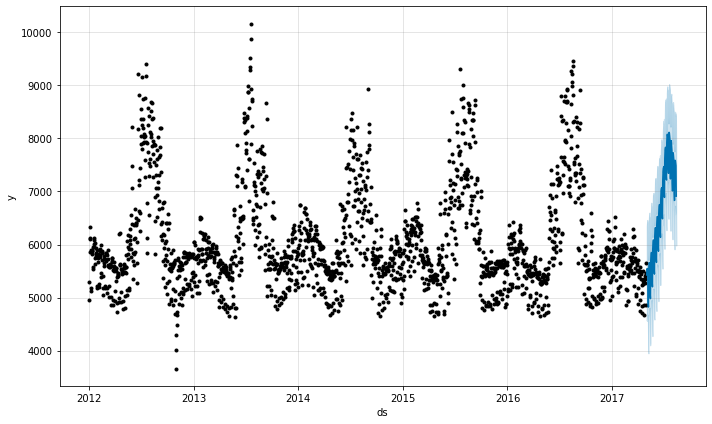

In [26]:
fig1 = m.plot(forecast)

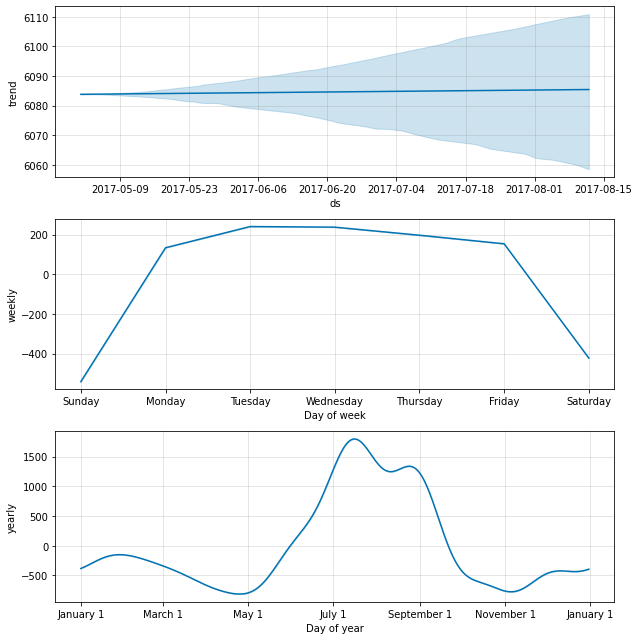

In [27]:
fig2 = m.plot_components(forecast)

In [28]:
from fbprophet.diagnostics import cross_validation
cv_results = cross_validation( model = m, initial = '731 days', horizon = '365 days')

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

In [29]:
cv_results.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-05-02,5559.551339,4710.370634,6392.946886,5460.325000,2014-05-01
1,2014-05-03,4969.534110,4148.529908,5752.938472,4893.683333,2014-05-01
2,2014-05-04,4845.648008,4017.782666,5653.477585,4764.137500,2014-05-01
3,2014-05-05,5526.522430,4690.535651,6333.540458,5406.762500,2014-05-01
4,2014-05-06,5621.421825,4774.024659,6411.753159,5409.750000,2014-05-01


In [30]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days 12:00:00,251934.957320,501.931228,406.226480,0.073006,0.064884,0.890110
1,37 days 00:00:00,258700.644740,508.626233,413.610053,0.074289,0.066338,0.884615
2,37 days 12:00:00,261010.981546,510.892339,417.001487,0.074872,0.067382,0.884615
3,38 days 00:00:00,263880.662431,513.693160,420.198633,0.075152,0.068328,0.884615
4,38 days 12:00:00,267581.621653,517.282922,425.433592,0.075989,0.069015,0.884615
...,...,...,...,...,...,...,...
653,363 days 00:00:00,259816.478758,509.721962,448.447325,0.082792,0.081943,0.983516
654,363 days 12:00:00,261440.978078,511.312994,449.524741,0.082983,0.081943,0.983516
655,364 days 00:00:00,266023.137790,515.774309,453.230988,0.083848,0.083850,0.978022
656,364 days 12:00:00,266023.939627,515.775086,452.936386,0.083833,0.083850,0.978022
